## microonde

In [24]:
import numpy as np
import pandas as pd
import sys
sys.path.append("D:/Progetti/LabProgram")
import lab_utilities as lu
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import os

In [25]:
lu.setDefaultGraphStyle(size=(13,8))

### Onde stazionarie

In [26]:
#constants
delta_emitter = 12.2e-2
delta_receiver = 16.3e-2
err_deltas = 0.1e-2

### Dipendenza da r

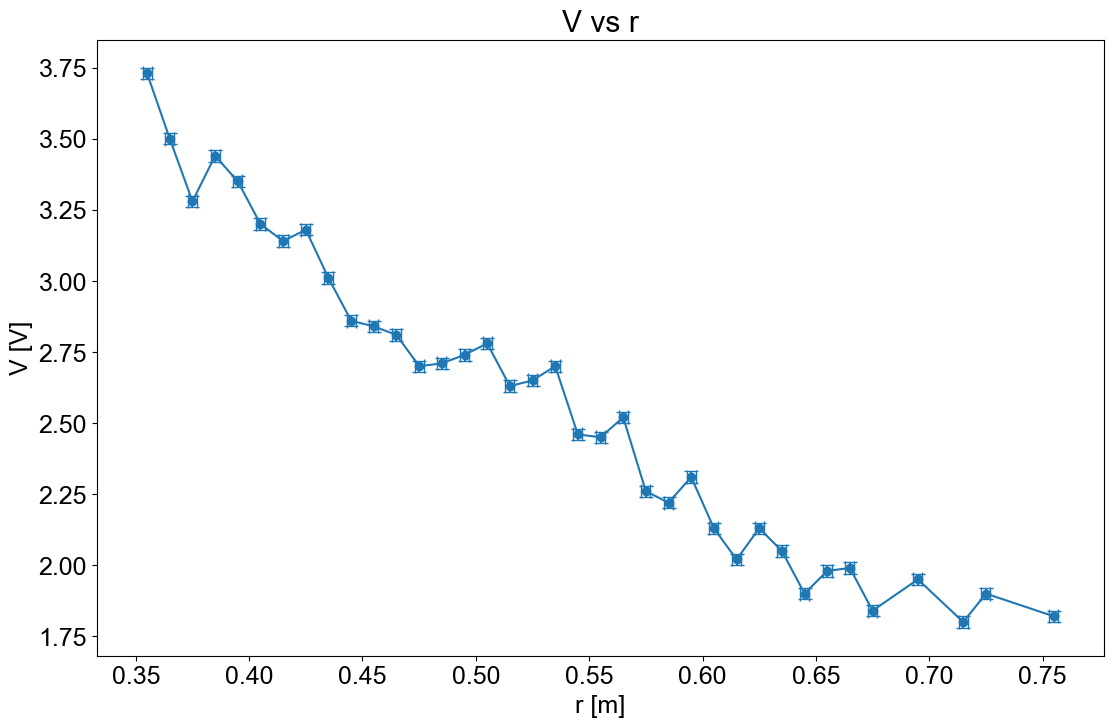

In [19]:
#load data
data = pd.read_csv("data/onde_stazionarie/ondestazionarie_r.csv")
#calculate r
ls_r = data["ls"] #in cm
lr_r = data["lr"] #in cm
ls_r = lu.lmultiply(ls_r, 1e-2) #in m
lr_r = lu.lmultiply(lr_r, 1e-2) #in m
err_l = 0.1e-2
rs = [lr - ls - delta_emitter - delta_receiver for ls, lr in zip(ls_r, lr_r)]
rs_err = [np.sqrt(err_l**2 + err_l**2 + err_deltas**2 + err_deltas**2) for i in range(len(rs))]

#plot "V" (in data), vs r [with error]
plt.errorbar(rs, data["V"], xerr=rs_err, yerr=data["err_V"], fmt="-o", label="data")
plt.xlabel("r [m]")
plt.ylabel("V [V]")
plt.title("V vs r")
plt.show()

1/r^2 fit:
a = 0.30723960005981815 +- 0.0019308096184010545
b = 1.352003523330559 +- 0.008313495702374976
covariance = -1.4743017933472213e-05

1/r fit:
a = 1.271172739267328 +- 0.007911947995144582
b = 0.09494893698748597 +- 0.015733926805186073
covariance = -0.00012173751220381775


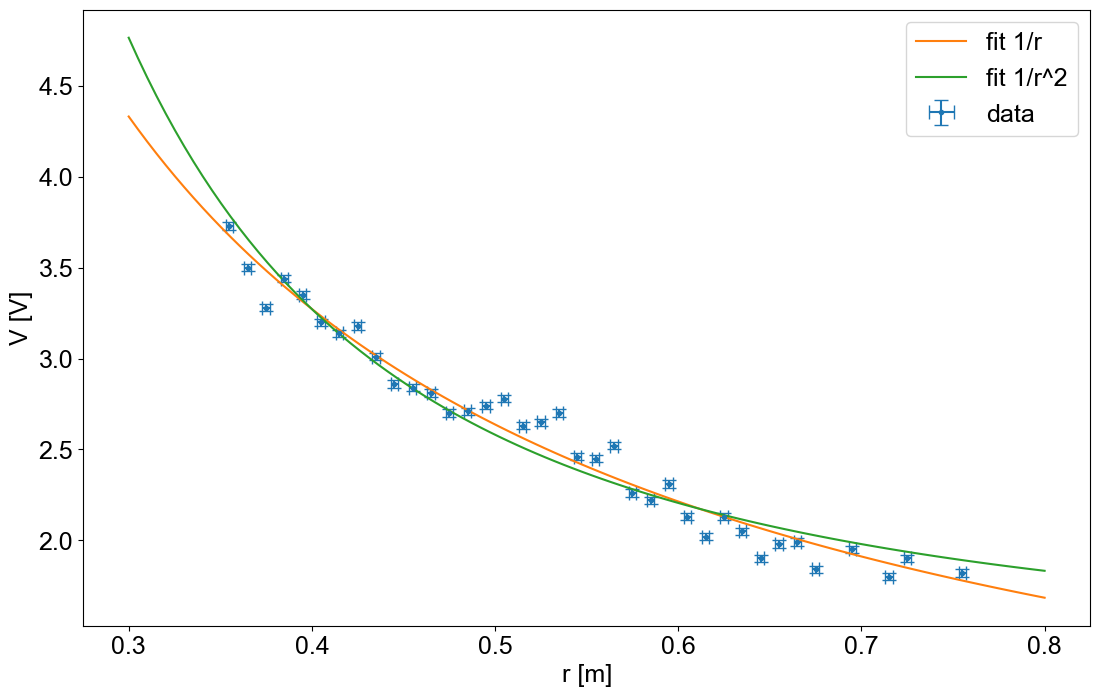

In [20]:
#try to fit with 1/r^2
def fit_func_2(x, a, b):
    return a/x**2 + b

#also try to fit with 1/r
def fit_func(x, a, b):
    return a/x + b

#usce scipy.optimize.curve_fit
popt_2, pcov_2 = curve_fit(fit_func_2, rs, data["V"], sigma=data["err_V"], absolute_sigma=True)
print("1/r^2 fit:")
print("a = {} +- {}".format(popt_2[0], np.sqrt(pcov_2[0,0])))
print("b = {} +- {}".format(popt_2[1], np.sqrt(pcov_2[1,1])))
print("covariance = {}".format(pcov_2[0,1]))
print()

popt, pcov = curve_fit(fit_func, rs, data["V"], sigma=data["err_V"], absolute_sigma=True)
print("1/r fit:")
print("a = {} +- {}".format(popt[0], np.sqrt(pcov[0,0])))
print("b = {} +- {}".format(popt[1], np.sqrt(pcov[1,1])))
print("covariance = {}".format(pcov[0,1]))

#plot fit and data
plt.errorbar(rs, data["V"], xerr=rs_err, yerr=data["err_V"], fmt=".", label="data")
x = np.linspace(0.3, 0.8, 100)
x_2 = np.linspace(0.3, 0.8, 100)
plt.plot(x, fit_func(x, *popt), label="fit 1/r")
plt.plot(x_2, fit_func_2(x_2, *popt_2), label="fit 1/r^2")
plt.xlabel("r [m]")
plt.ylabel("V [V]")
plt.legend()
plt.show()


#### Massimi

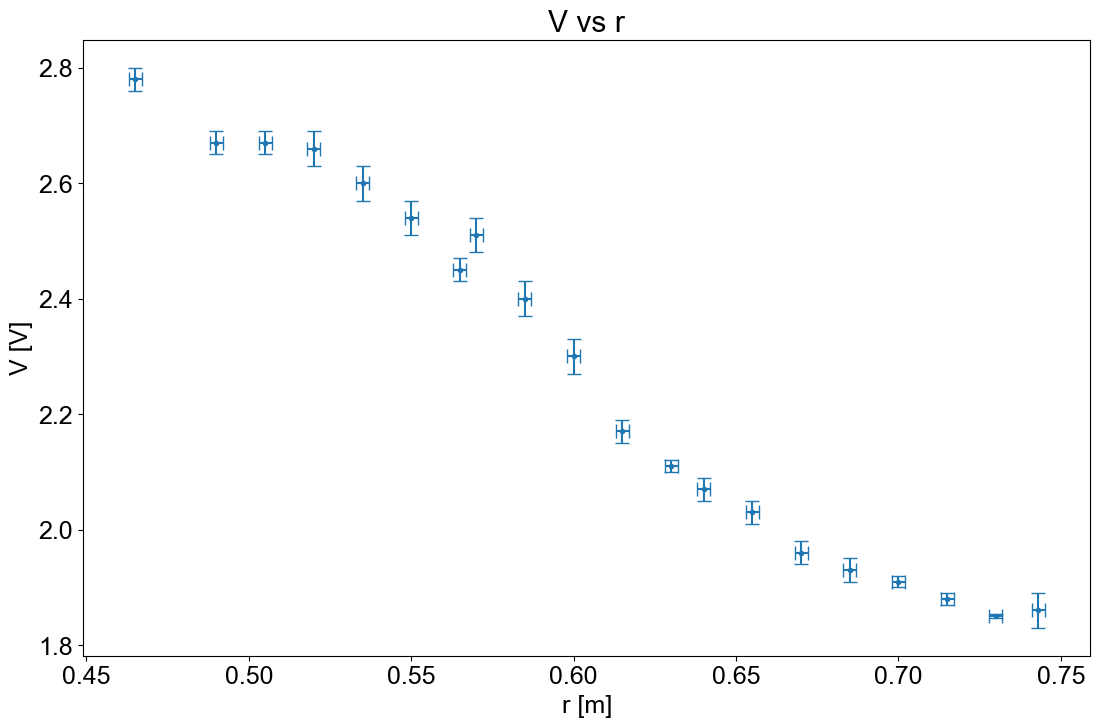

In [27]:
data_max = pd.read_csv("data/onde_stazionarie/ondestazionarie_r_massimi.csv")
#calculate r
ls_max = data_max["ls"] #in cm
lr_max = data_max["lr"] #in cm
ls_max = lu.lmultiply(ls_max, 1e-2) #in m
lr_max = lu.lmultiply(lr_max, 1e-2) #in m
err_l = 0.1e-2
rs_max = [lr - ls - delta_emitter - delta_receiver for ls, lr in zip(ls_max, lr_max)]
rs_max_err = [np.sqrt(err_l**2 + err_l**2 + err_deltas**2 + err_deltas**2) for i in range(len(rs_max))]
#plot "V" (in data), vs r [with error]
plt.errorbar(rs_max, data_max["V"], xerr=rs_max_err, yerr=data_max["err_V"], fmt=".", label="data")
plt.xlabel("r [m]")
plt.ylabel("V [V]")
plt.title("V vs r")
plt.show()

In [32]:
#find wavelength
#distance between two maxima
distances = []
distances_err = []
for i in range(len(rs_max)-1):
    distances.append(rs_max[i+1] - rs_max[i])
    distances_err.append(np.sqrt(rs_max_err[i+1]**2 + rs_max_err[i]**2))
#mean distance
mean_distance = np.mean(distances)
wavelenght = abs(2*mean_distance)
#convert to cm
wavelenght = wavelenght*100
print("wavelenght = {}".format(wavelenght))


wavelenght = 2.9263157894736844


### Dipendenza da $\theta$

In [16]:
ls = 20e-2
lr = 77e-2
r_const = lr - ls - delta_emitter - delta_receiver
print("r_const = ", r_const)

r_const =  0.28500000000000003


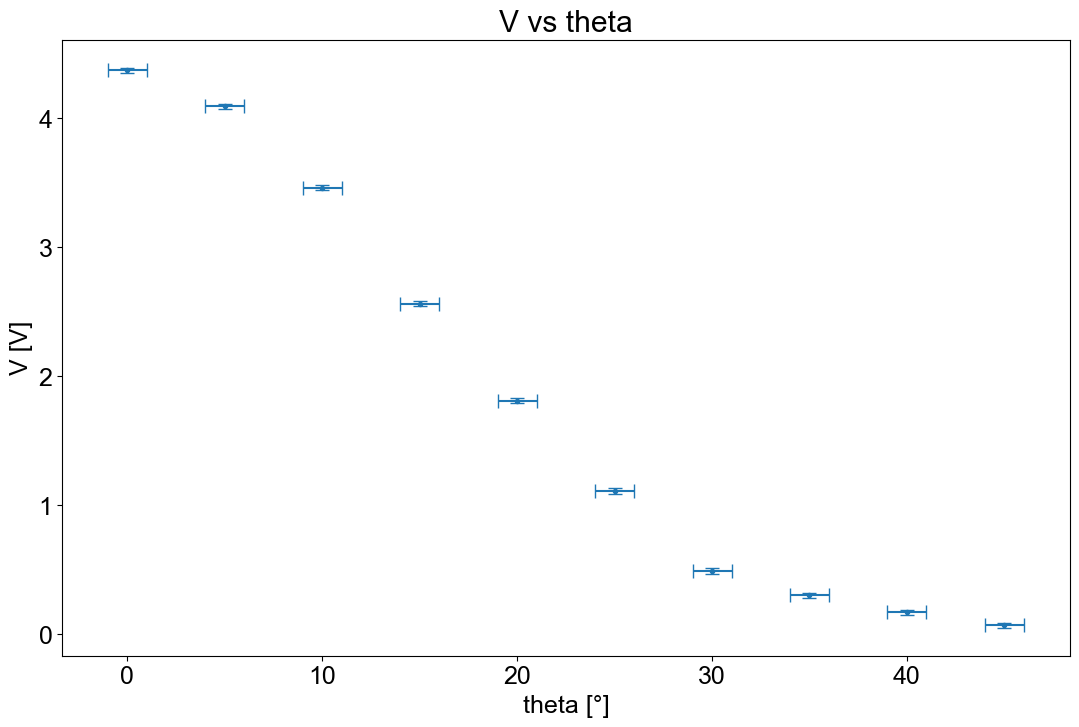

In [14]:
data_t = pd.read_csv("data/onde_stazionarie/ondestazionarie_theta.csv")

err_theta = 1
#plot "V" (in data), vs theta [with error]
plt.errorbar(data_t["theta"], data_t["V"], xerr=[err_theta for i in range(len(data["theta"]))], yerr=data_t["err_V"], fmt=".")
plt.xlabel("theta [°]")
plt.ylabel("V [V]")
plt.title("V vs theta")
plt.show()

## Polarizzazione

In [ ]:
r_p = 36.5e-2

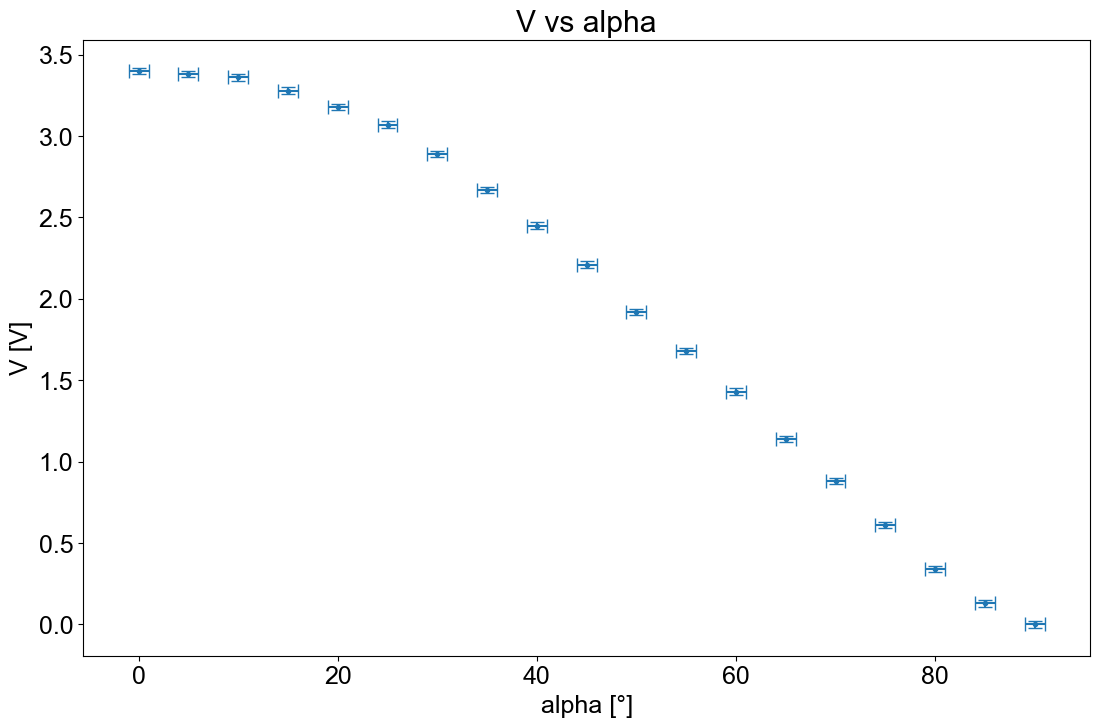

In [25]:
data_p = pd.read_csv("data/polarizzazione/polarizzazione_alpha.csv")
data_p.head()
#plot V vs alpha
plt.errorbar(data_p["alpha"], data_p["V"], xerr=1, yerr=data_p["err_V"], fmt=".")
plt.xlabel("alpha [°]")
plt.ylabel("V [V]")
plt.title("V vs alpha")
plt.show()

## Riflessione

### Legge di snell

Text(0.5, 1.0, 'angolo riflessione vs angolo incidenza')

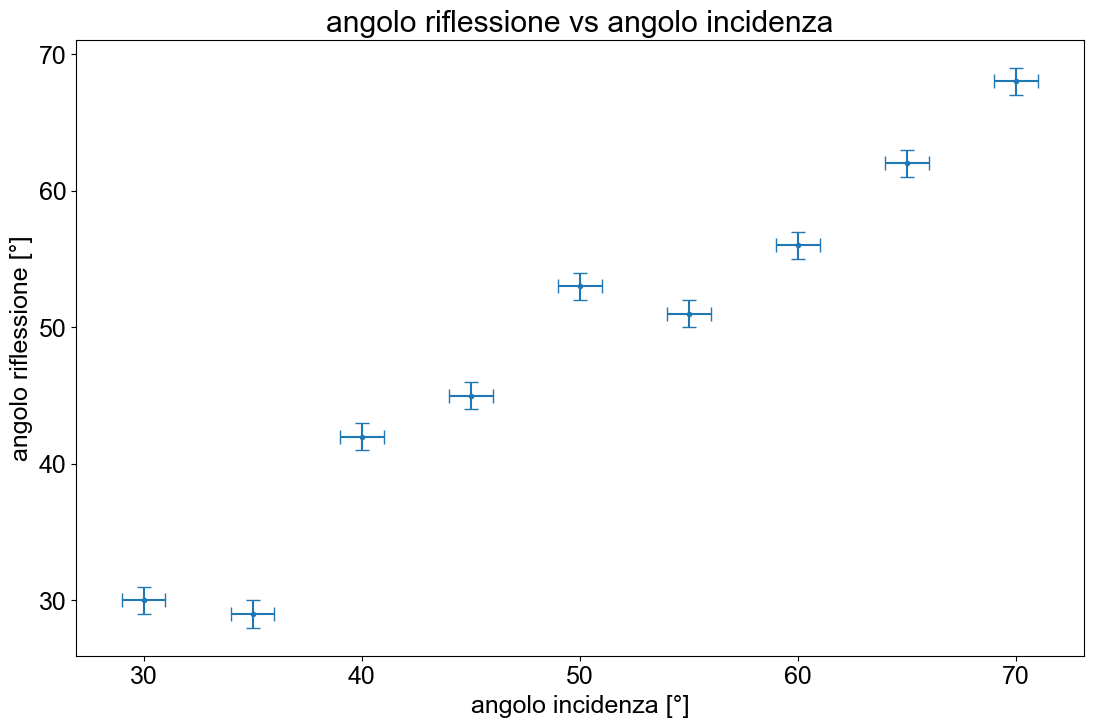

In [34]:
data_rfiless = pd.read_csv("data/riflessione/riflessione.csv")
theta_in = 90 - data_rfiless["theta_l"]
theta_ri = 270 - data_rfiless["theta_r"] + data_rfiless["theta_l"]
#plot theta_i vs theta_r
plt.errorbar(theta_in, theta_ri, xerr=1, yerr=1, fmt=".")
plt.xlabel("angolo incidenza [°]")
plt.ylabel("angolo riflessione [°]")
plt.title("angolo riflessione vs angolo incidenza")

## Rifrazione

In [63]:
#Misura con prisma vuoto $\longrightarrow$ $\theta = 0$
#Misura con styrene $\longrightarrow$ $\theta = 9°$
theta = 20
#index of refraction styrene
n_sty = np.sin(np.radians(29))/np.sin(np.radians(theta))
print("n_sty = ", n_sty)

n_sty =  1.4174885009176357


## Brewster

In [4]:
import os

20.0
25.0
35.0


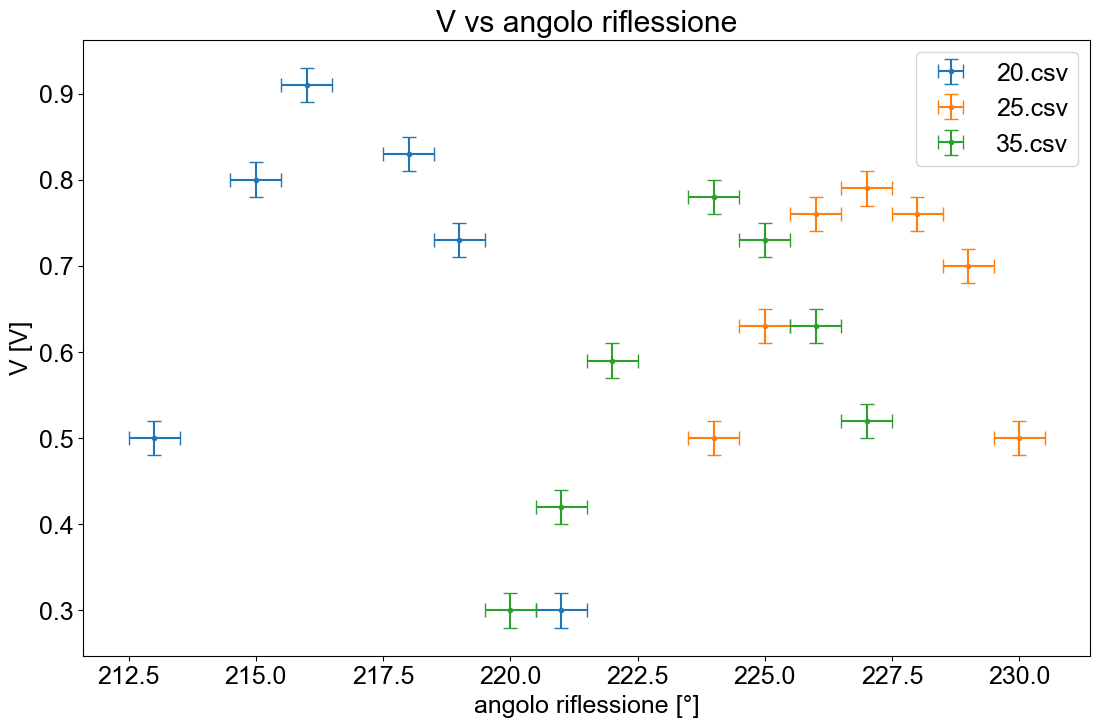

In [66]:
#in data/brewster are csv files with data for each angle of incidence

#load data, use os to get all files in data/brewster
for file in os.listdir("data/brewster"):
    data_b = pd.read_csv("data/brewster/" + file)
    #plot theta_i vs theta_r
    incidence_angle = float(file.split(".")[0])
    print(incidence_angle)
    theta_ri_b = 270 - data_b["theta_r"] + incidence_angle
    plt.errorbar(data_b["theta_r"], data_b["V"], xerr=0.5, yerr=data_b["err_V"], fmt=".", label=file)
    plt.xlabel("angolo riflessione [°]")
    plt.ylabel("V [V]")

plt.title("V vs angolo riflessione")
plt.legend()
plt.show()

In [6]:
#find max of parabola by interpolating
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

In [101]:
maxes = []
maxes_err = []
for file in os.listdir("data/brewster/riflessione"):
    data_b = pd.read_csv("data/brewster/riflessione/" + file)
    incidence_angle = float(file.split(".")[0])
    theta_ri_b = 270 - data_b["theta_r"] + incidence_angle
    #fit parabola
    popt, pcov = curve_fit(parabola, theta_ri_b, data_b["V"])
    print("incidence angle = ", incidence_angle)
    max_angle = -popt[1]/(2*popt[0])
    maxes.append(max_angle)
    D = np.array([popt[1]/(2*popt[0]**2), -1/(2*popt[0]),0])
    max_err = np.sqrt(np.transpose(D) @ pcov @ D)
    maxes_err.append(max_err)
    print("error = ", max_err, "°")
    #print params
    print()

incidence angle =  20.0
error =  0.02055186926677327 °

incidence angle =  30.0
error =  0.030061888241046313 °

incidence angle =  40.0
error =  0.17936210626449822 °

incidence angle =  50.0
error =  0.22023967662670316 °

incidence angle =  55.0
error =  0.1327512736740539 °

incidence angle =  60.0
error =  0.15038603884786023 °



Text(0, 0.5, 'angolo riflessione [°]')

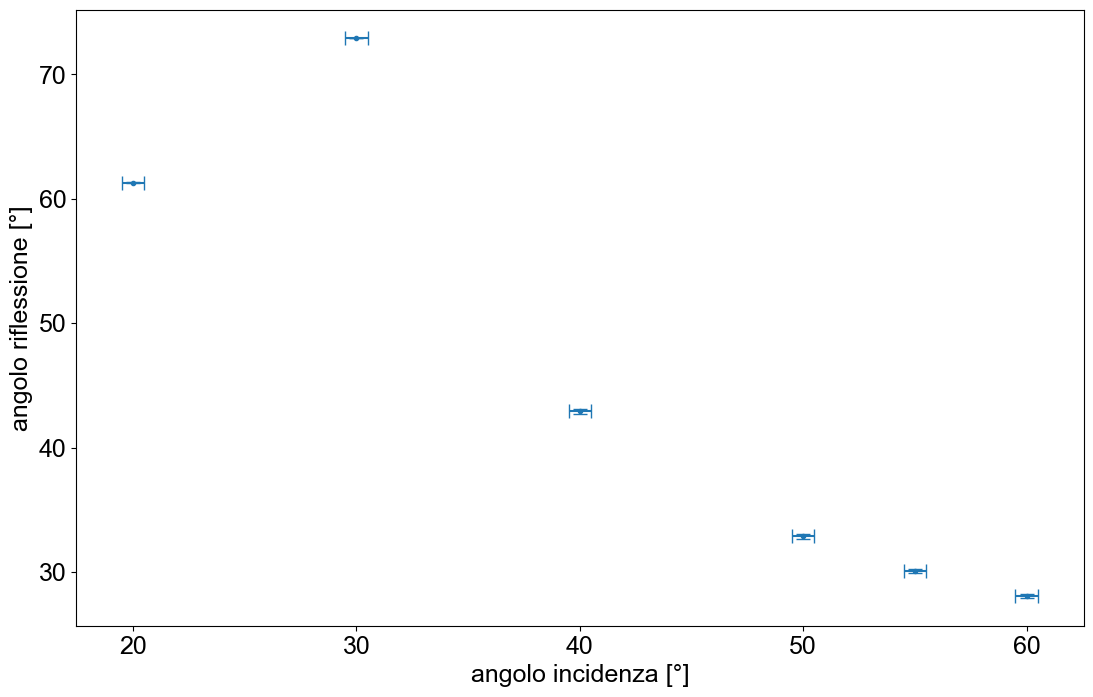

In [97]:
#plot maxs vs incidence angle
#plot with error
plt.errorbar([float(file.split(".")[0]) for file in os.listdir("data/brewster")], maxes, xerr=0.5, yerr=maxes_err, fmt=".")
plt.xlabel("angolo incidenza [°]")
plt.ylabel("angolo riflessione [°]")

#### con trasmissione

max_1.csv
max angle =  55.18442769675124 +/- 0.26930549080774063 °

max_2.csv
max angle =  51.78774191606293 +/- 0.17579137173418988 °



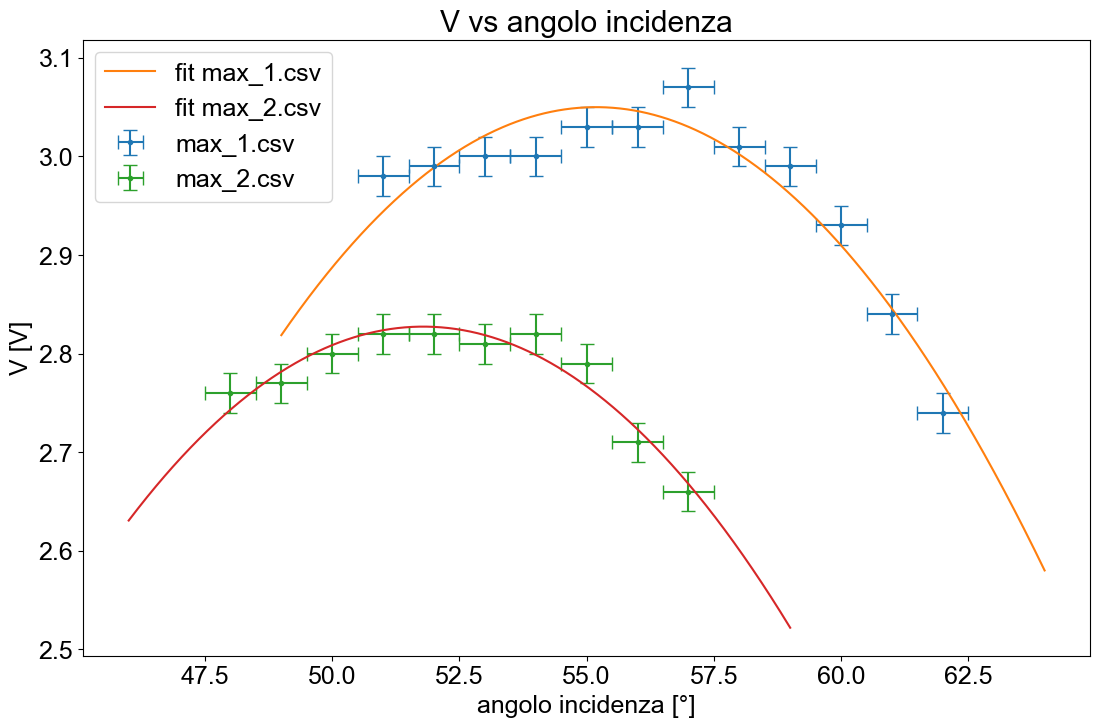

In [74]:
maxes_t = []
maxes_err_t = []
f_names = []

#set up plot
fig, ax = plt.subplots()

for file in os.listdir("data/brewster/trasmissione"):
    print(file)
    data_b = pd.read_csv("data/brewster/trasmissione/" + file)
    f_names.append(file)
    if(file == "max_1.csv"):
        incidence_angle = [360-  theta_e for theta_e in data_b["theta_e"]]
    #fit parabola
    else:
        incidence_angle = [theta_e for theta_e in data_b["theta_e"]]
    popt, pcov = curve_fit(parabola, incidence_angle, data_b["V"])
    max_angle = -popt[1]/(2*popt[0])
    maxes_t.append(max_angle)
    D = np.array([popt[1]/(2*popt[0]**2), -1/(2*popt[0]),0])
    max_err = np.sqrt(np.transpose(D) @ pcov @ D)
    maxes_err_t.append(max_err)
    print("max angle = ", max_angle , "+/-", max_err, "°")
    #print params
    print()

    #plot data and fit for each file in the same plot
    ax.errorbar(incidence_angle, data_b["V"], xerr=0.5, yerr=data_b["err_V"], fmt=".", label=file)
    linspace = np.linspace(min(incidence_angle)-2, max(incidence_angle)+2, 1000)
    ax.plot(linspace, parabola(linspace, *popt), label="fit " + file)
    #axes labels
    ax.set_xlabel("angolo incidenza [°]")
    ax.set_ylabel("V [V]")
    ax.set_title("V vs angolo incidenza")
    ax.legend()


In [77]:
brewster_angle = (maxes_t[0] + maxes_t[1])/2
brewster_angle_err = np.sqrt(maxes_err_t[0]**2 + maxes_err_t[1]**2) / 2
print("brewster angle = ", brewster_angle, "+/-", brewster_angle_err, "°")

brewster angle =  53.486084806407085 +/- 0.16080116118625062 °


# Fabry Perot

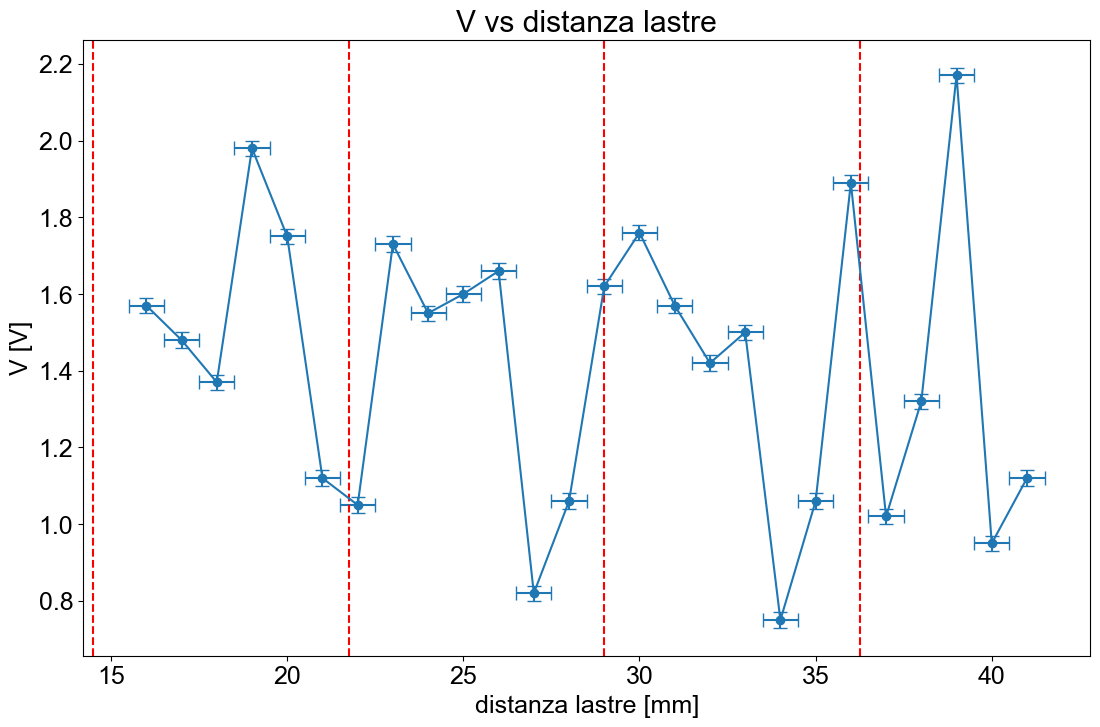

In [40]:
data_fp = pd.read_csv("data/fabry_perot/fabry_perot.csv")
#plot V vs r_lastre with errors
fp_r = data_fp["r_lastre"]
fp_V = data_fp["V"]
#reorder data by increasing r_lastre
fp_r, fp_V = zip(*sorted(zip(fp_r, fp_V)))
data_fp["r_lastre"] = fp_r
data_fp["V"] = fp_V

fig, ax = plt.subplots()

ax.errorbar(data_fp["r_lastre"], data_fp["V"], xerr=0.5, yerr=data_fp["err_V"], fmt="o-")
ax.set_xlabel("distanza lastre [mm]")
ax.set_ylabel("V [V]")
ax.set_title("V vs distanza lastre")
#add vertical lines evry 29/4 = 7.25 mm starting from 7.25 mm
for i in range(1, 5):
    ax.axvline(x=7.25 + 7.25*i, color="red", linestyle="--")


### Massimi

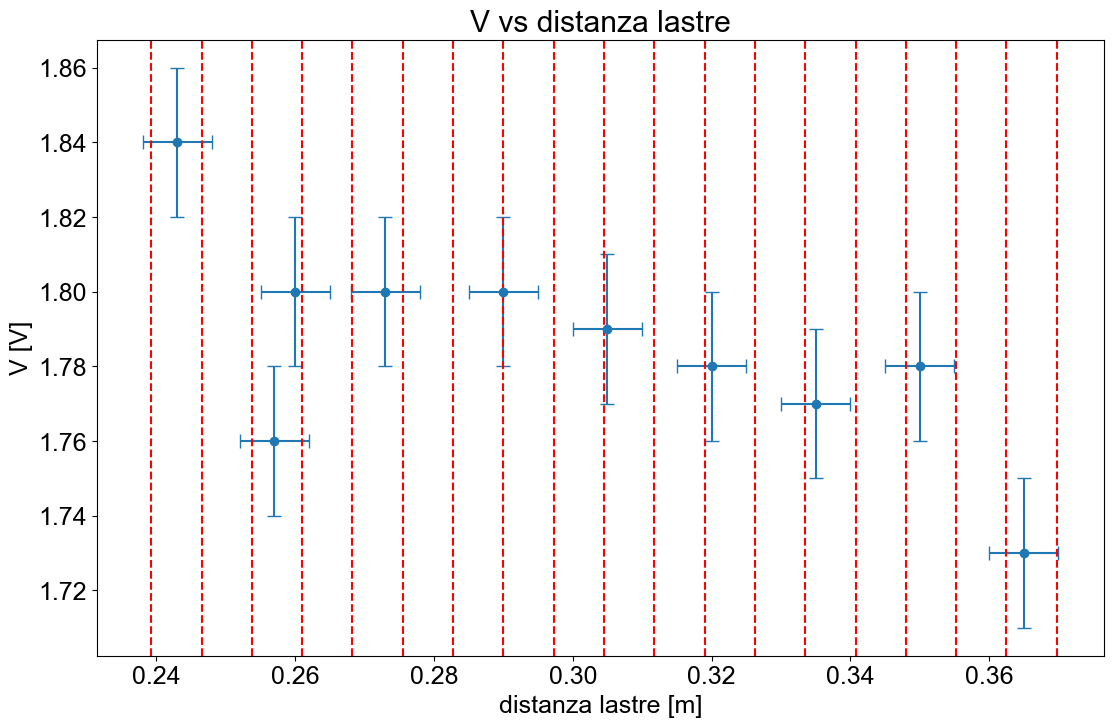

In [61]:
data_fpm = pd.read_csv("data/fabry_perot/fabry_perot_max.csv")
#plot V vs r_lastre with errors
fp_r = data_fpm["r_lastre"]
#fp_r - 45
fp_r = [(r - 45)*1e-2 for r in fp_r]
fp_V = data_fpm["V"]
#reorder data by increasing r_lastre
fp_r, fp_V = zip(*sorted(zip(fp_r, fp_V)))
data_fpm["r_lastre"] = fp_r
data_fpm["V"] = fp_V


fig, ax = plt.subplots()
ax.errorbar(data_fpm["r_lastre"], data_fpm["V"], xerr=0.5e-2, yerr=data_fpm["err_V"], fmt="o")
ax.set_xlabel("distanza lastre [m]")
ax.set_ylabel("V [V]")
ax.set_title("V vs distanza lastre")

#add vertical lines evry 29/4 = 7.25 mm starting from 7.25 * 2 = 14.5
for i in range(1, 20):
    ax.axvline(x=(7.25e-3*32) + 7.25e-3*i, color="red", linestyle="--")